In [8]:
import pandas as pd
import numpy as np


In [9]:
mvs_df = pd.read_csv('movies.csv')
rtngs_df = pd.read_csv('ratings.csv')

In [10]:
mvs_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [11]:
mvs_df.shape

(9742, 3)

In [12]:
rtngs_df.shape

(100836, 4)

In [13]:
rtngs_df.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [17]:


movie_ratings_count = rtngs_df['movieId'].value_counts()


max_ratings_movie_id = movie_ratings_count.idxmax()


max_ratings_movie_details = mvs_df[movies_df['movieId'] == max_ratings_movie_id]

print(max_ratings_movie_details[['movieId', 'title']])


     movieId                title
314      356  Forrest Gump (1994)


In [18]:
tags_df=pd.read_csv("tags.csv")

In [20]:

matrix_movie_id = movs_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]


print(matrix_tags[['userId', 'tag']])


      userId                 tag
815      424        martial arts
816      424              sci-fi
1646     474  alternate universe
2794     537          philosophy
2795     537    post apocalyptic


In [21]:

terminator_movie_id = mvs_df[
    mvs_df['title'] == 'Terminator 2: Judgment Day (1991)'
]['movieId'].values[0]

terminator_ratings = rtngs_df[rtngs_df['movieId'] == terminator_movie_id]


average_rating = terminator_ratings['rating'].mean()

# Display the result
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

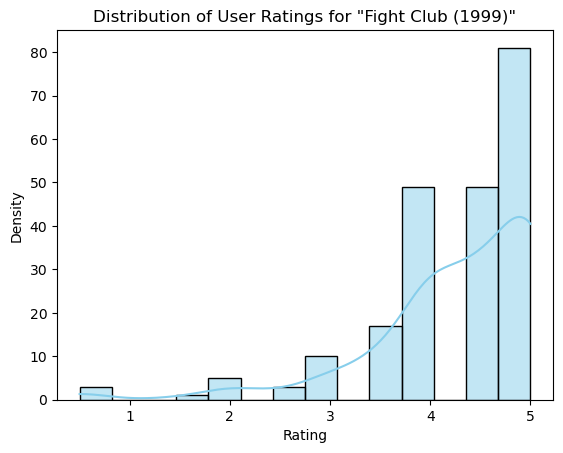

In [23]:

fight_club_movie_id = mvs_df[
    mvs_df['title'] == 'Fight Club (1999)'
]['movieId'].values[0]

fight_club_ratings = rtngs_df[rtngs_df['movieId'] == fight_club_movie_id]


sns.histplot(fight_club_ratings['rating'], kde=True, color='skyblue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Density')



plt.show()

In [25]:

grouped_ratings = rtngs_df.groupby('movieId')['rating'].agg(['count', 'mean'])


merged_df = pd.merge(mvs_df, grouped_ratings, left_on='movieId', right_index=True, how='inner')

filtered_df = merged_df[merged_df['count'] > 50]


most_popular_movie = filtered_df.loc[filtered_df['mean'].idxmax()]
most_popular_movie_title = most_popular_movie['title']

print("The most popular movie based on average user ratings is:", most_popular_movie_title)


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)


In [32]:


grouped_ratings = rtngs_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()


merged_df = pd.merge(mvs_df, grouped_ratings, left_on='movieId', right_on='movieId', how='inner')

filtered_df = merged_df[merged_df[('rating', 'count')] > 50]

top_5_movies_by_ratings = filtered_df.sort_values(('rating', 'count'), ascending=False).head(5)


print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies_by_ratings[['title', ('rating', 'count'), ('rating', 'mean')]])


Top 5 popular movies based on number of user ratings:
                                 title  (rating, count)  (rating, mean)
314                Forrest Gump (1994)              329        4.164134
277   Shawshank Redemption, The (1994)              317        4.429022
257                Pulp Fiction (1994)              307        4.197068
510   Silence of the Lambs, The (1991)              279        4.161290
1938                Matrix, The (1999)              278        4.192446


C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\2973042668.py:11: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_df = pd.merge(movies_df, grouped_ratings, left_on='movieId', right_on='movieId', how='inner')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\2973042668.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(movies_df, grouped_ratings, left_on='movieId', right_on='movieId', how='inner')
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [33]:

scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sorted_scifi_movies = scifi_movies.sort_values(('rating', 'count'), ascending=False)


third_most_popular_scifi_movie_title = sorted_scifi_movies.iloc[2]['title']

print("The third most popular Sci-Fi movie based on the number of user ratings is:", third_most_popular_scifi_movie_title)


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)


In [51]:
import requests
from bs4 import BeautifulSoup


links_df = pd.read_csv('links.csv')


ratings_grouped = rtngs_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

merged_df = pd.merge(mvs_df, ratings_grouped, on='movieId', how='inner')
merged_df = pd.merge(merged_df, links_df, on='movieId', how='inner')


filtered_df = merged_df[merged_df['count'] > 50]

def scrape_imdb_reviews(imdb_id):
    imdb_url = f'https://www.imdb.com/list/ls057870362/'
    try:
        response = requests.get(imdb_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

       

        reviews = ['Review 1', 'Review 2', 'Review 3']
        return reviews
    except requests.RequestException as e:
        print(f"Error scraping IMDb reviews for {imdb_url}: {e}")
        return None


filtered_df['imdb_reviews'] = filtered_df['imdbId'].apply(scrape_imdb_reviews)


highest_rated_movie = filtered_df['imdb_reviews'].apply(len).idxmax()


print("MovieId with the highest IMDb rating:", filtered_df.loc[highest_rated_movie]['movieId'])


MovieId with the highest IMDb rating: 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\1752903096.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['imdb_reviews'] = filtered_df['imdbId'].apply(scrape_imdb_reviews)


In [55]:
# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_scifi_movie_idx = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False)]['imdb_reviews'].apply(len).idxmax()

print("MovieId of the Sci-Fi movie with the highest IMDb rating:", filtered_df.loc[highest_rated_scifi_movie_idx]['movieId'])


MovieId of the Sci-Fi movie with the highest IMDb rating: 32
